## Importing necessary libraries

In [134]:


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import seaborn as sns



## Examining the dataset

In [172]:
train = pd.read_csv('/content/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Mean, Mode, Median

In [173]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

target = ['satisfaction']

# Split into test and train
X_train = train[features]

# Select numeric columns for calculating statistics
numeric_columns = X_train.select_dtypes(include=['number']).columns
feature_stats = []

for col in numeric_columns:
    mean_val = X_train[col].mean()
    mode_val = X_train[col].mode().iloc[0]
    median_val = X_train[col].median()

    feature_stats.append({
        'Feature': col,
        'Mean': mean_val,
        'Mode': mode_val,
        'Median': median_val
    })

feature_statistics = pd.DataFrame(feature_stats)

print(feature_statistics)

                              Feature         Mean   Mode  Median
0                                 Age    39.379706   39.0    40.0
1                     Flight Distance  1189.448375  337.0   843.0
2               Inflight wifi service     2.729683    3.0     3.0
3   Departure/Arrival time convenient     3.060296    4.0     3.0
4              Ease of Online booking     2.756901    3.0     3.0
5                       Gate location     2.976883    3.0     3.0
6                      Food and drink     3.202129    4.0     3.0
7                     Online boarding     3.250375    4.0     3.0
8                        Seat comfort     3.439396    4.0     4.0
9              Inflight entertainment     3.358158    4.0     4.0
10                   On-board service     3.382363    4.0     4.0
11                   Leg room service     3.351055    4.0     4.0
12                   Baggage handling     3.631833    4.0     4.0
13                    Checkin service     3.304290    4.0     3.0
14        

In [175]:
total_missing = train.isnull().sum()
percent_missing = round((total_missing / len(train)) * 100,3)

missing_data = pd.DataFrame({
  'Total Missing': total_missing,
  'Percent Missing': percent_missing
  })

missing_data = missing_data.sort_values(by='Percent Missing', ascending=False)
missing_data

,Total Missing,Percent Missing
Arrival Delay in Minutes,310,0.298
Unnamed: 0,0,0.000
Online boarding,0,0.000
Departure Delay in Minutes,0,0.000
Cleanliness,0,0.000
Inflight service,0,0.000
Checkin service,0,0.000
Baggage handling,0,0.000
Leg room service,0,0.000
On-board service,0,0.000


## Ratio of the Target Feature

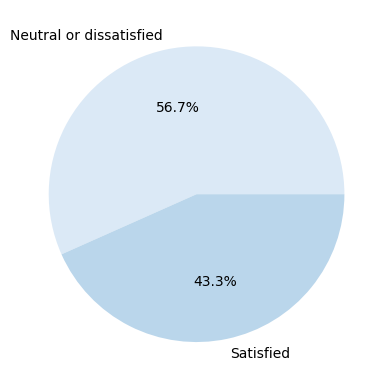

In [176]:
plt.pie(train['satisfaction'].value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Blues"), autopct = '%1.1f%%')
pass

## Ratio of the Descriptive Features

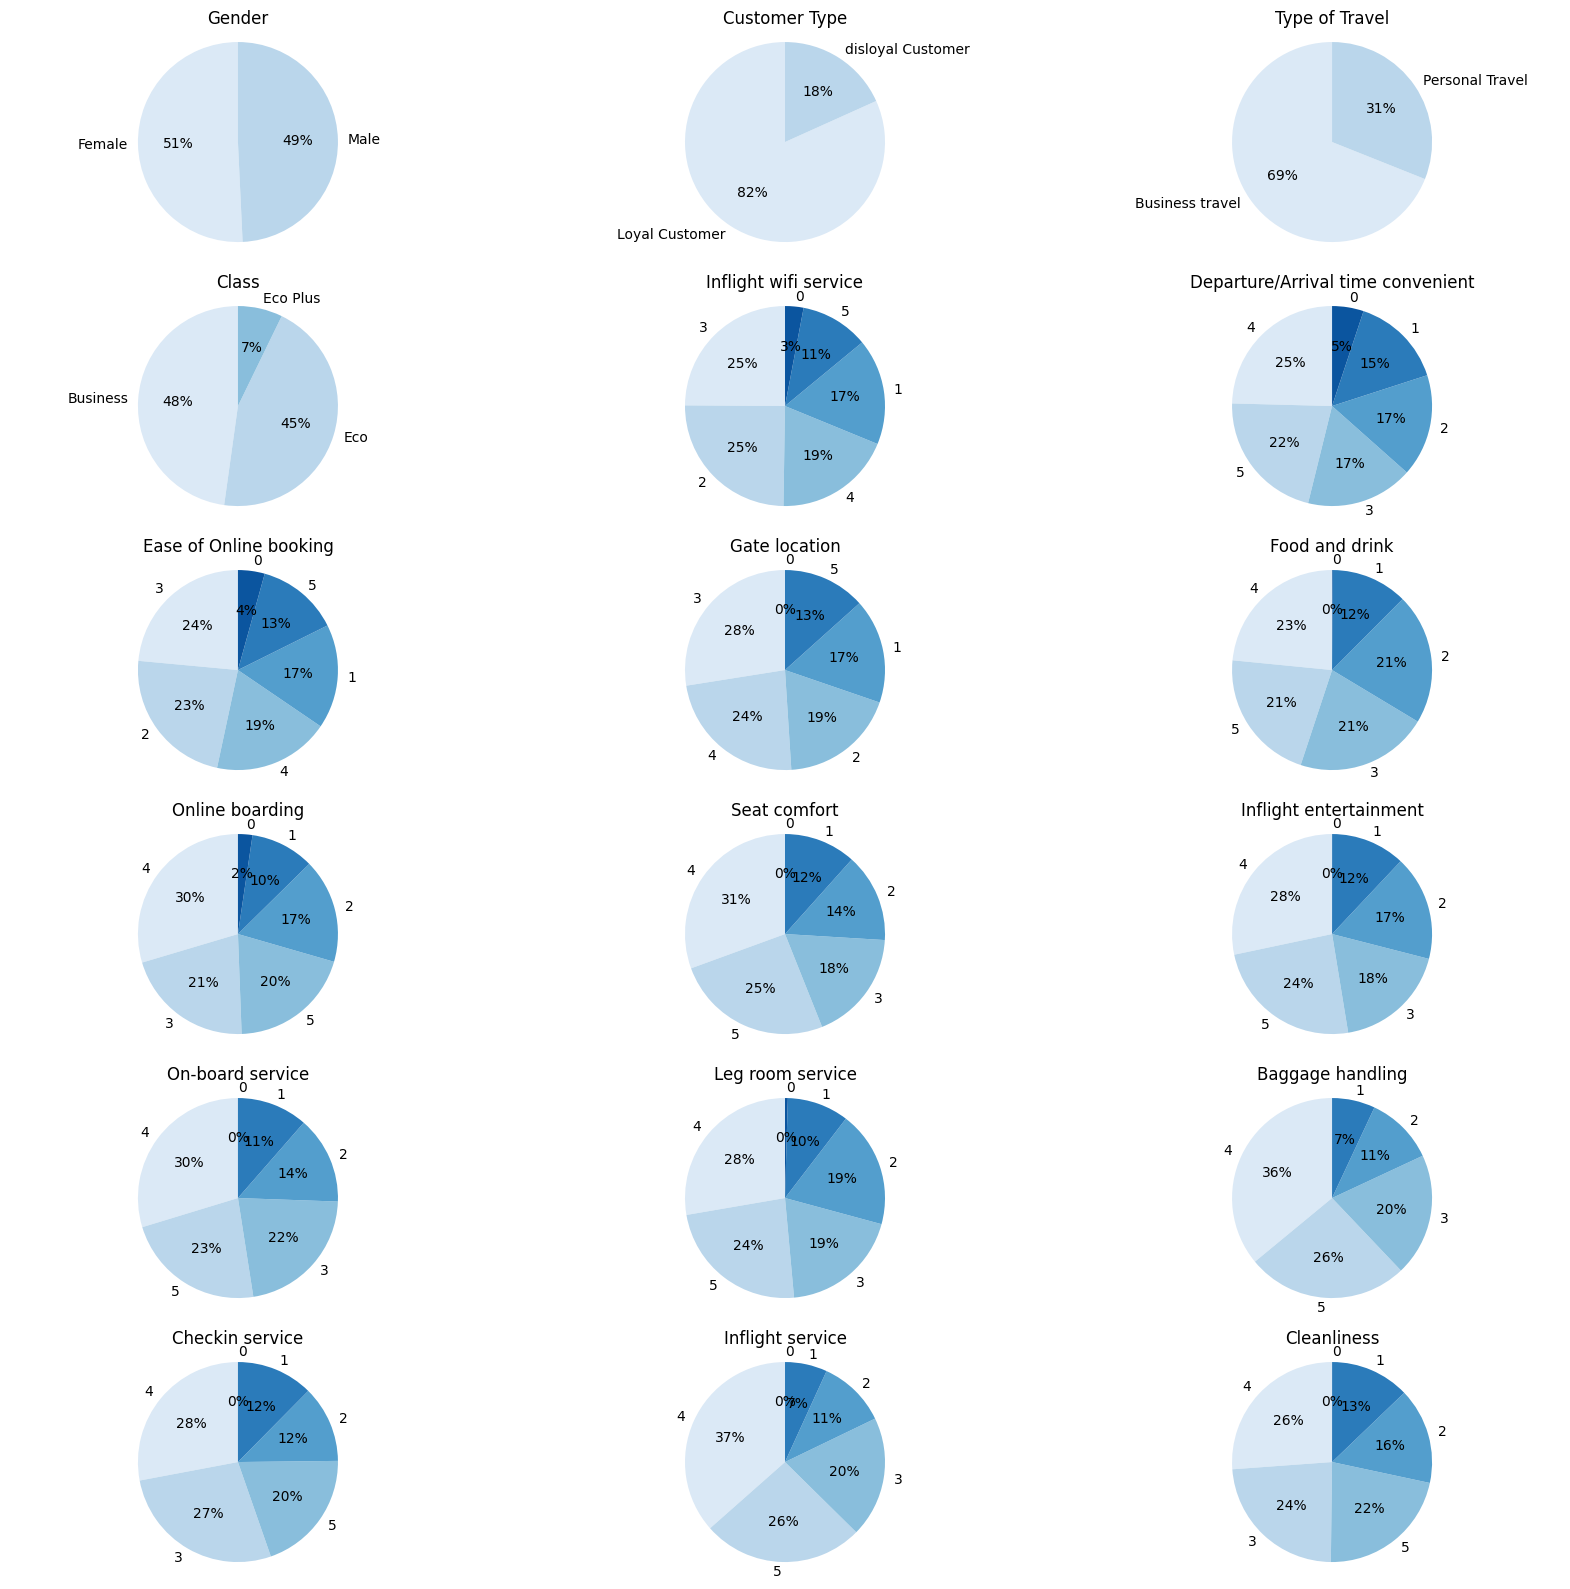

In [138]:

categorical_indexes = [2, 3, 5, 6] + list(range(8, 22))
categ = train.iloc[:, categorical_indexes]

# Adjust the number of rows and columns based on the number of categorical columns
num_rows = 6
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, col in enumerate(categ):
    column_values = train[col].value_counts()
    labels = column_values.index
    sizes = column_values.values

    row = i // num_cols
    column = i % num_cols

    if len(labels) > 1:  # Only plot pie chart if there are multiple categories
        axes[row, column].pie(sizes, labels=labels, colors=sns.color_palette("Blues"), autopct='%1.0f%%', startangle=90)
        axes[row, column].axis('equal')
        axes[row, column].set_title(col)
    else:
        axes[row, column].axis('off')  # If only one category, display an empty plot

# Hide empty subplots if there are any
for i in range(len(categ.columns), num_rows * num_cols):
    row = i // num_cols
    column = i % num_cols
    axes[row, column].axis('off')

plt.show()



## Removing unnecessary features : data selection

In [177]:

train = train.drop(['Unnamed: 0', 'id'], axis = 1) #data selection

train.columns


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


## Box Plot Diagrams



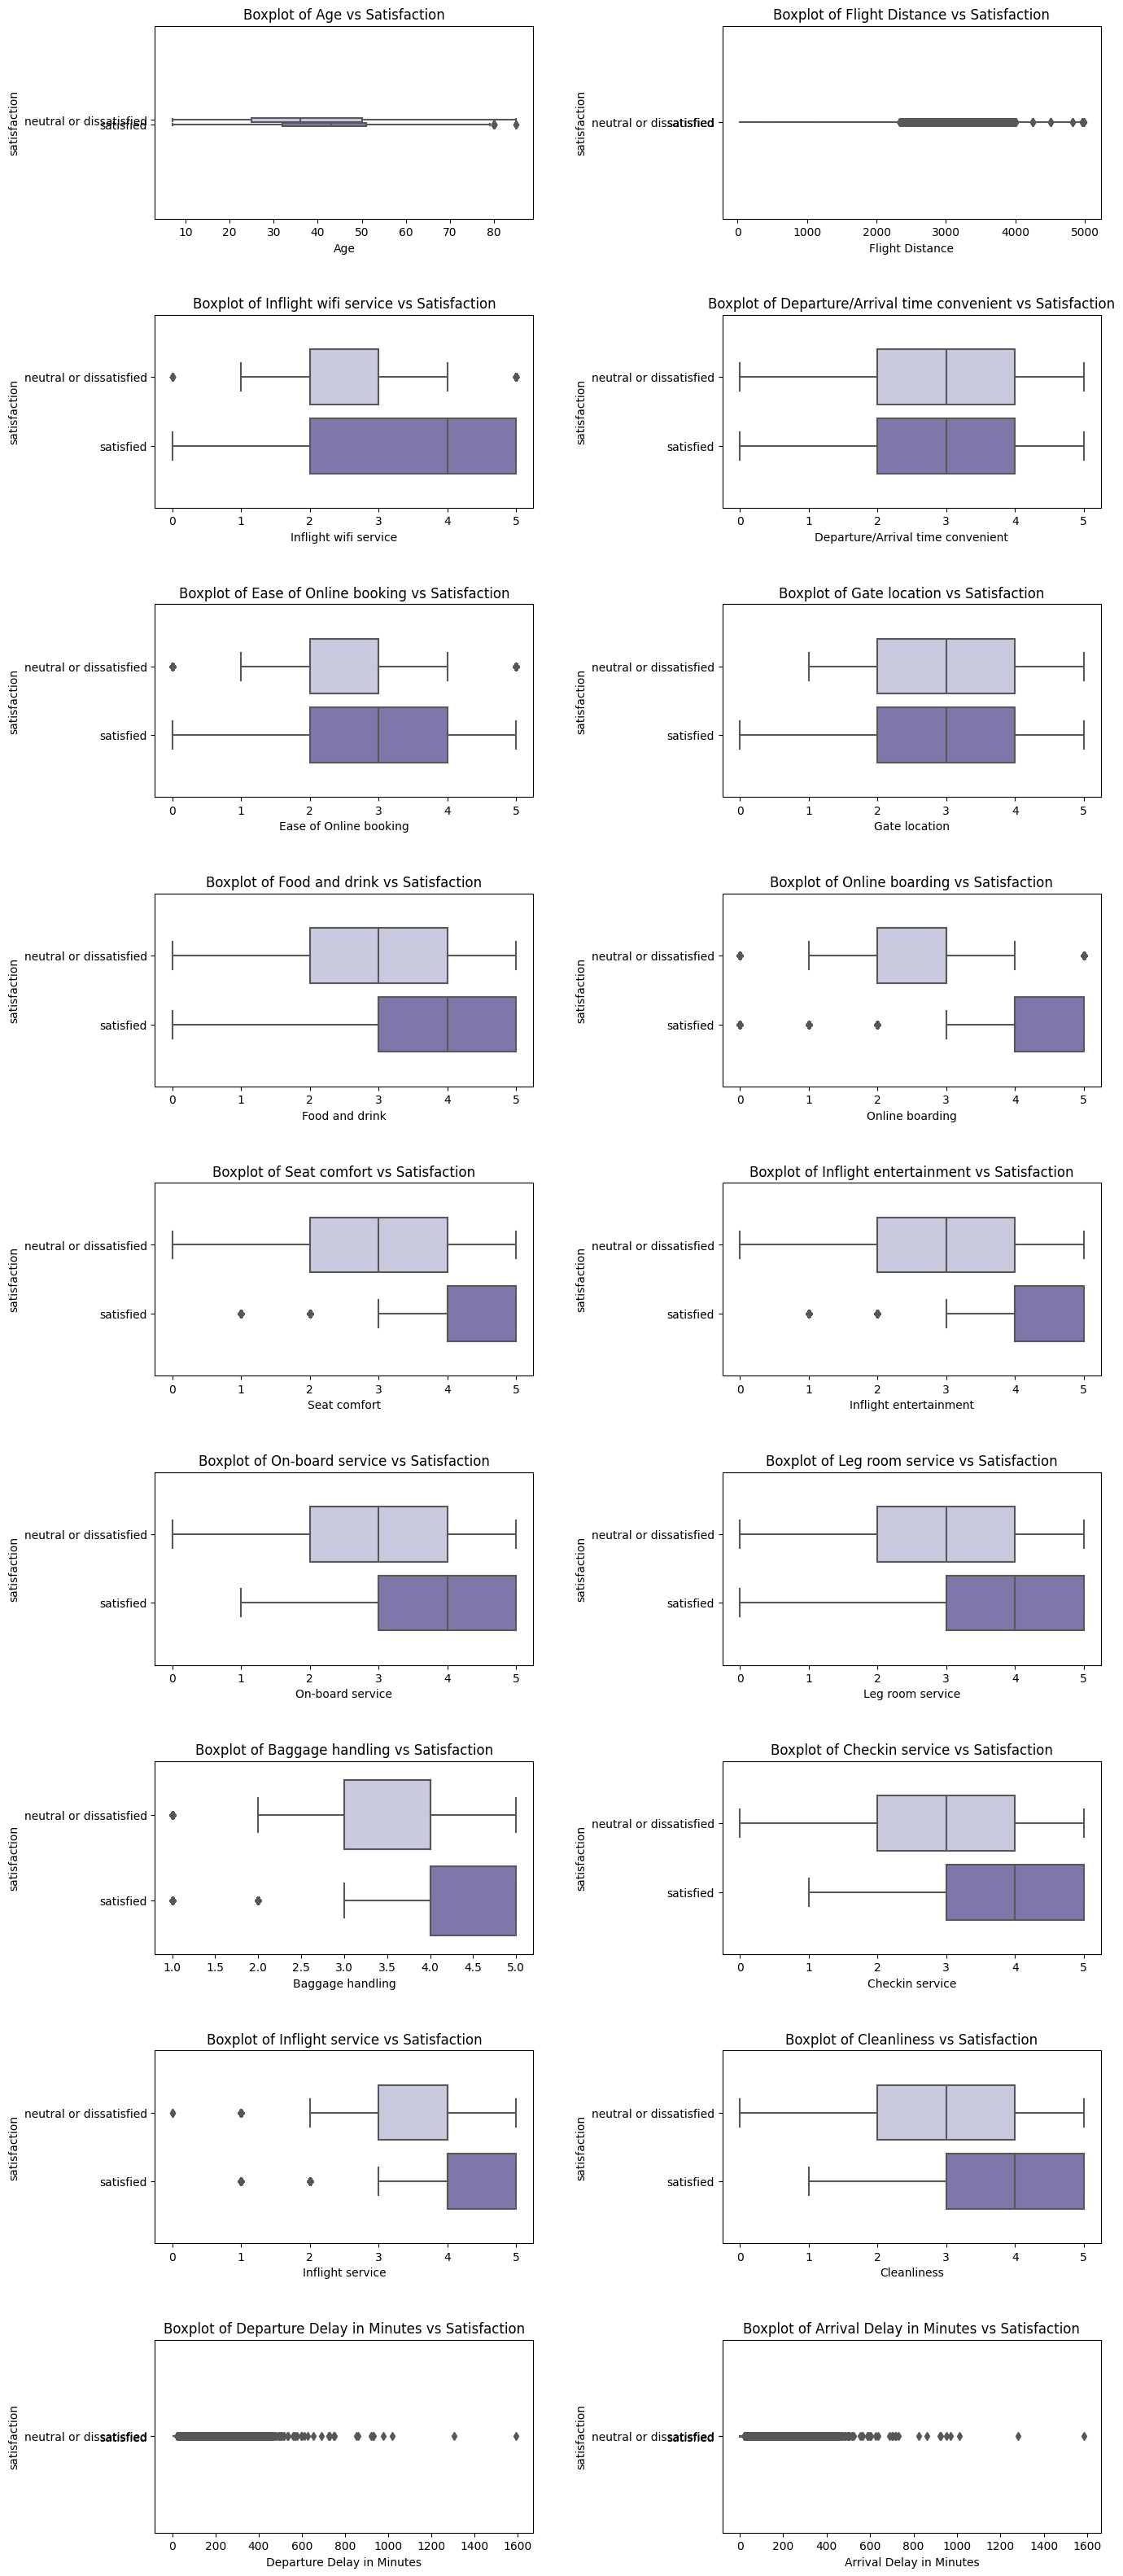

In [178]:



num_rows = 9
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, col in enumerate(train.select_dtypes(include=['number']).columns):
    row = i // num_cols
    column = i % num_cols

    sns.boxplot(x=col, y='satisfaction', data=train, ax=axes[row, column], palette="Purples")
    axes[row, column].axis('equal')
    axes[row, column].set_title(f'Boxplot of {col} vs Satisfaction')





##Data preprocessing by filling in missing values

In [141]:
#data preprocessing by filling in missing values
train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean(), inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Cleaning Duplicated Data

In [142]:
# remove duplicate data if there is any


train = train.drop_duplicates()
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Removing Outliers

In [143]:

# remove outliers
def remove_outlier(x):
    Q1 = x.quantile(0.20)
    Q3 = x.quantile(0.80)
    IQR = Q3 - Q1
    print(IQR)

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return [lower, upper]


lower_flight, upper_flight = remove_outlier(train['Flight Distance'])
lower_ddim, upper_ddim = remove_outlier(train['Departure Delay in Minutes'])
lower_adim, upper_adim = remove_outlier(train['Arrival Delay in Minutes'])
lower_age, upper_age = remove_outlier(train['Age'])

# Getting indices of outliers
outliers_flight = (train['Flight Distance'] < lower_flight) | (train['Flight Distance'] > upper_flight)
outliers_ddim = (train['Departure Delay in Minutes'] < lower_ddim) | (train['Departure Delay in Minutes'] > upper_ddim)
outliers_adim = (train['Arrival Delay in Minutes']< lower_adim) | (train['Arrival Delay in Minutes'] > upper_adim)
outliers_age = (train['Age'] < lower_age) | (train['Age'] > upper_age)

# Combining outlier indices
outliers_indices = np.where(outliers_flight | outliers_age | outliers_adim | outliers_ddim)[0]

# Removing outliers
train.drop(index=outliers_indices, inplace=True)
train.info()

train.shape

1707.0
19.0
19.0
28.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92950 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             92950 non-null  object 
 1   Customer Type                      92950 non-null  object 
 2   Age                                92950 non-null  int64  
 3   Type of Travel                     92950 non-null  object 
 4   Class                              92950 non-null  object 
 5   Flight Distance                    92950 non-null  int64  
 6   Inflight wifi service              92950 non-null  int64  
 7   Departure/Arrival time convenient  92950 non-null  int64  
 8   Ease of Online booking             92950 non-null  int64  
 9   Gate location                      92950 non-null  int64  
 10  Food and drink                     92950 non-null  int64  
 11  Online boarding                

(92950, 23)

## Data Tranformation by formatting the data type

In [144]:

def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1

def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1

def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1

def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0
    else:
        return -1

def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

def process_data(df):
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)

    return df


train = process_data(train) # data transformation

train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92950 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             92950 non-null  int64  
 1   Customer Type                      92950 non-null  int64  
 2   Age                                92950 non-null  int64  
 3   Type of Travel                     92950 non-null  int64  
 4   Class                              92950 non-null  int64  
 5   Flight Distance                    92950 non-null  int64  
 6   Inflight wifi service              92950 non-null  int64  
 7   Departure/Arrival time convenient  92950 non-null  int64  
 8   Ease of Online booking             92950 non-null  int64  
 9   Gate location                      92950 non-null  int64  
 10  Food and drink                     92950 non-null  int64  
 11  Online boarding                    92950 non-null  in

##Correlation Heatmap

<ipython-input-145-facb51d49a7d>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

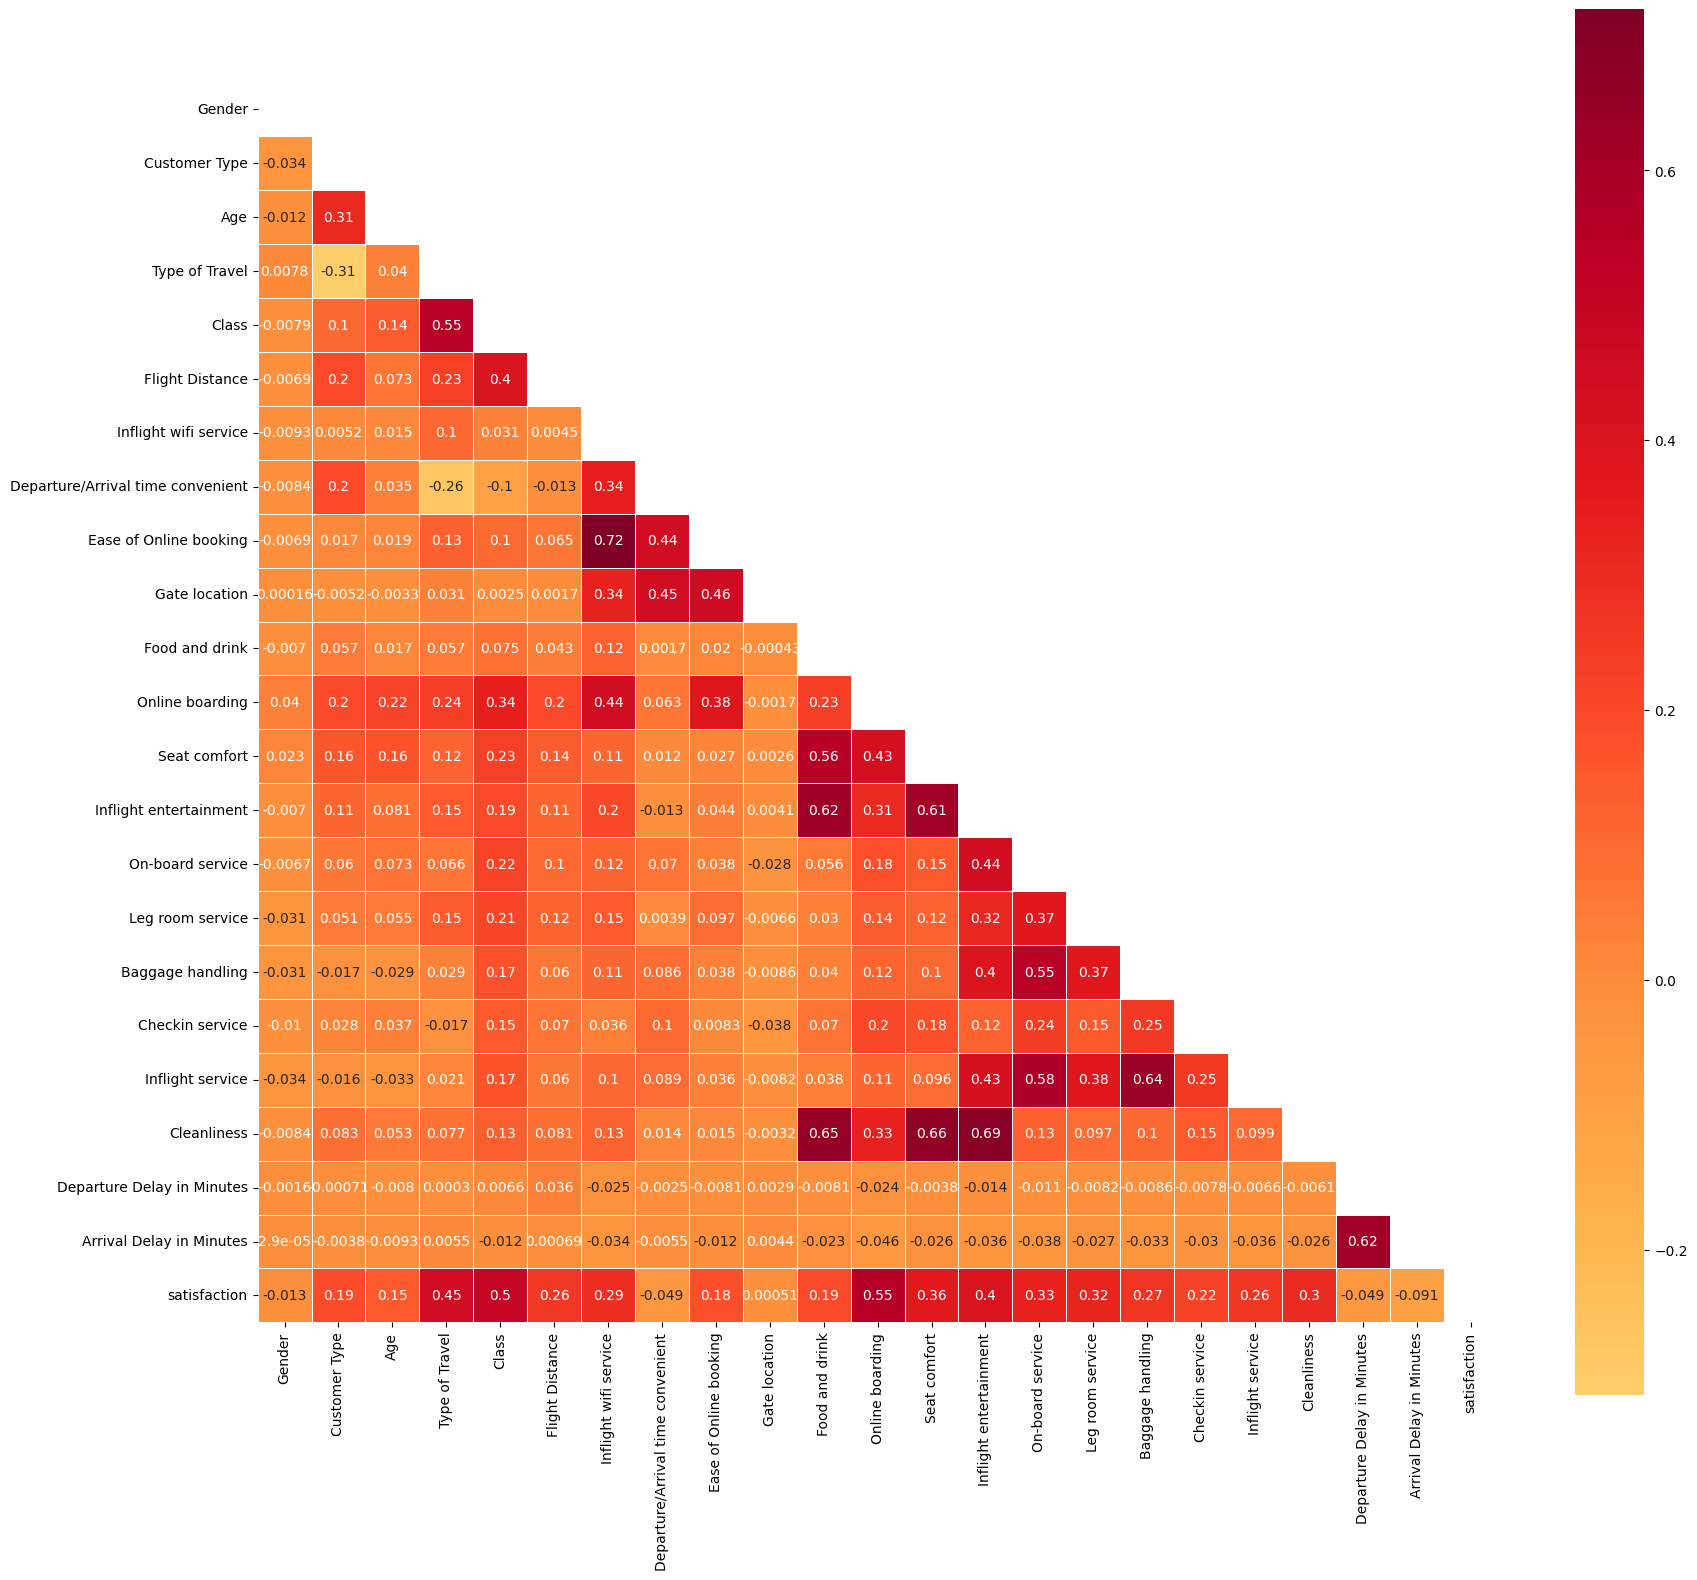

In [145]:
#Remove redundant/correlating attributes correlation triangle

corr = train.corr(method='spearman')
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlOrRd", center=0, square=True, linewidths=.5) #dimensionally reductions corralting attributes

## Fixed k-Interval Discretization

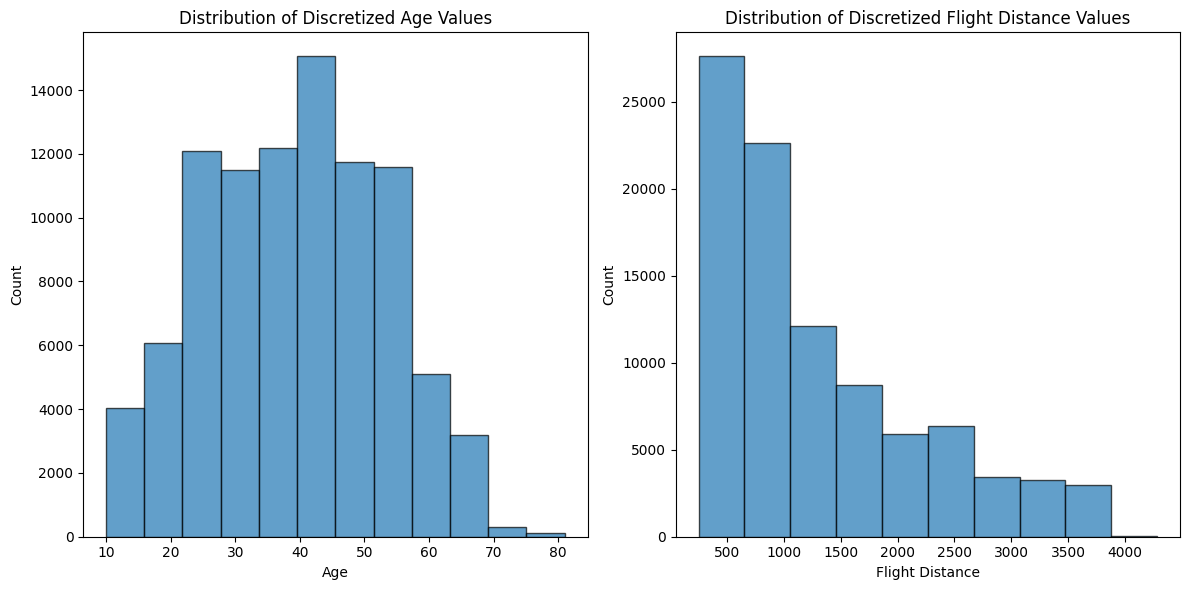

Value counts for 'Age':
42    15056
36    12172
23    12090
49    11737
55    11585
29    11489
16     6067
62     5112
10     4038
68     3194
75      290
81      120
Name: Age, dtype: int64

Value counts for 'Flight Distance':
252     27614
704     22610
1151    12110
1598     8717
2492     6374
2045     5886
2939     3412
3386     3254
3833     2950
4280       23
Name: Flight Distance, dtype: int64


In [146]:
k_age = 12
discretized_age, bins_age = pd.cut(train['Age'], bins=k_age, retbins=True, labels=False)

# Assigning midpoint values of bins to 'Age' column
train['Age'], bins_age = pd.cut(train['Age'], bins=k_age, retbins=True, labels=False)
train['Age'] = bins_age[train['Age']] + (bins_age[1] - bins_age[0]) / 2
train['Age'] = train['Age'].astype(int)

k_distance = 10
discretized_flight_distance, bins_distance = pd.cut(train['Flight Distance'], bins=k_distance, retbins=True, labels=False)

# Assigning midpoint values of bins to 'Flight Distance' column
train['Flight Distance'], bins_d = pd.cut(train['Flight Distance'], bins=k_distance, retbins=True,  labels=False)
bins_d = bins_d.astype(int)
train['Flight Distance'] = bins_d[train['Flight Distance']] + (bins_d[1] - bins_d[0]) / 2  # Assigning the midpoint of each bin
train['Flight Distance'] = train['Flight Distance'].astype(int)

# Visualize the distribution after discretization
plt.figure(figsize=(12, 6))

# Plot for 'Age'
plt.subplot(1, 2, 1)
plt.hist(train['Age'], bins=k_age, edgecolor='black', alpha=0.7)
plt.title('Distribution of Discretized Age Values')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot for 'Flight Distance'
plt.subplot(1, 2, 2)
plt.hist(train['Flight Distance'], bins=k_distance, edgecolor='black', alpha=0.7)
plt.title('Distribution of Discretized Flight Distance Values')
plt.xlabel('Flight Distance')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print value counts
print("Value counts for 'Age':")
print(train['Age'].value_counts())

print("\nValue counts for 'Flight Distance':")
print(train['Flight Distance'].value_counts())


##Information Gain

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature: Online boarding Score: 0.21383613824098546
Feature: Inflight wifi service Score: 0.15905604404782192
Feature: Class Score: 0.13356844086416242
Feature: Type of Travel Score: 0.11267697153339551
Feature: Inflight entertainment Score: 0.09503904423667642
Feature: Seat comfort Score: 0.07796431283755378
Feature: Leg room service Score: 0.060303217577650337
Feature: On-board service Score: 0.058624484064075055
Feature: Flight Distance Score: 0.05471844418530658
Feature: Cleanliness Score: 0.0537674045255212
Feature: Ease of Online booking Score: 0.049951581272767775
Feature: Age Score: 0.042596870977108736
Feature: Baggage handling Score: 0.041550637715028316
Feature: Inflight service Score: 0.03505481103064323
Feature: Checkin service Score: 0.03197087704341861
Feature: Food and drink Score: 0.02647638945360775
Feature: Customer Type Score: 0.015342042107565845
Feature: Gate location Score: 0.009162685863854492
Feature: Departure Delay in Minutes Score: 0.003616762684877095
Featu

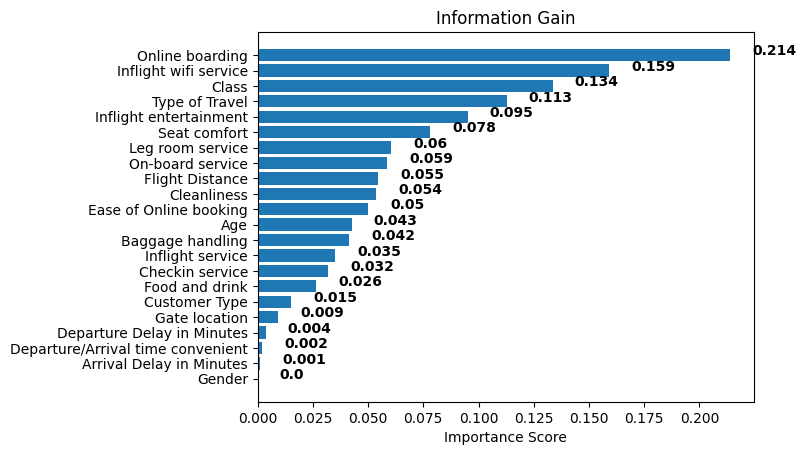

In [147]:

from sklearn.feature_selection import mutual_info_regression

X_train = train[features]
y_train = train[target]

# Apply Information Gain
ig = mutual_info_regression(X_train, y_train)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(train.columns)-1):
    feature_scores[train.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Information Gain")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

## Feature Elimination Based on IG


In [148]:
train = train.drop(['Gender','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient'], axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92950 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Customer Type           92950 non-null  int64
 1   Age                     92950 non-null  int64
 2   Type of Travel          92950 non-null  int64
 3   Class                   92950 non-null  int64
 4   Flight Distance         92950 non-null  int64
 5   Inflight wifi service   92950 non-null  int64
 6   Ease of Online booking  92950 non-null  int64
 7   Gate location           92950 non-null  int64
 8   Food and drink          92950 non-null  int64
 9   Online boarding         92950 non-null  int64
 10  Seat comfort            92950 non-null  int64
 11  Inflight entertainment  92950 non-null  int64
 12  On-board service        92950 non-null  int64
 13  Leg room service        92950 non-null  int64
 14  Baggage handling        92950 non-null  int64
 15  Checkin service   

## Count Plot of Features after Data Preparation

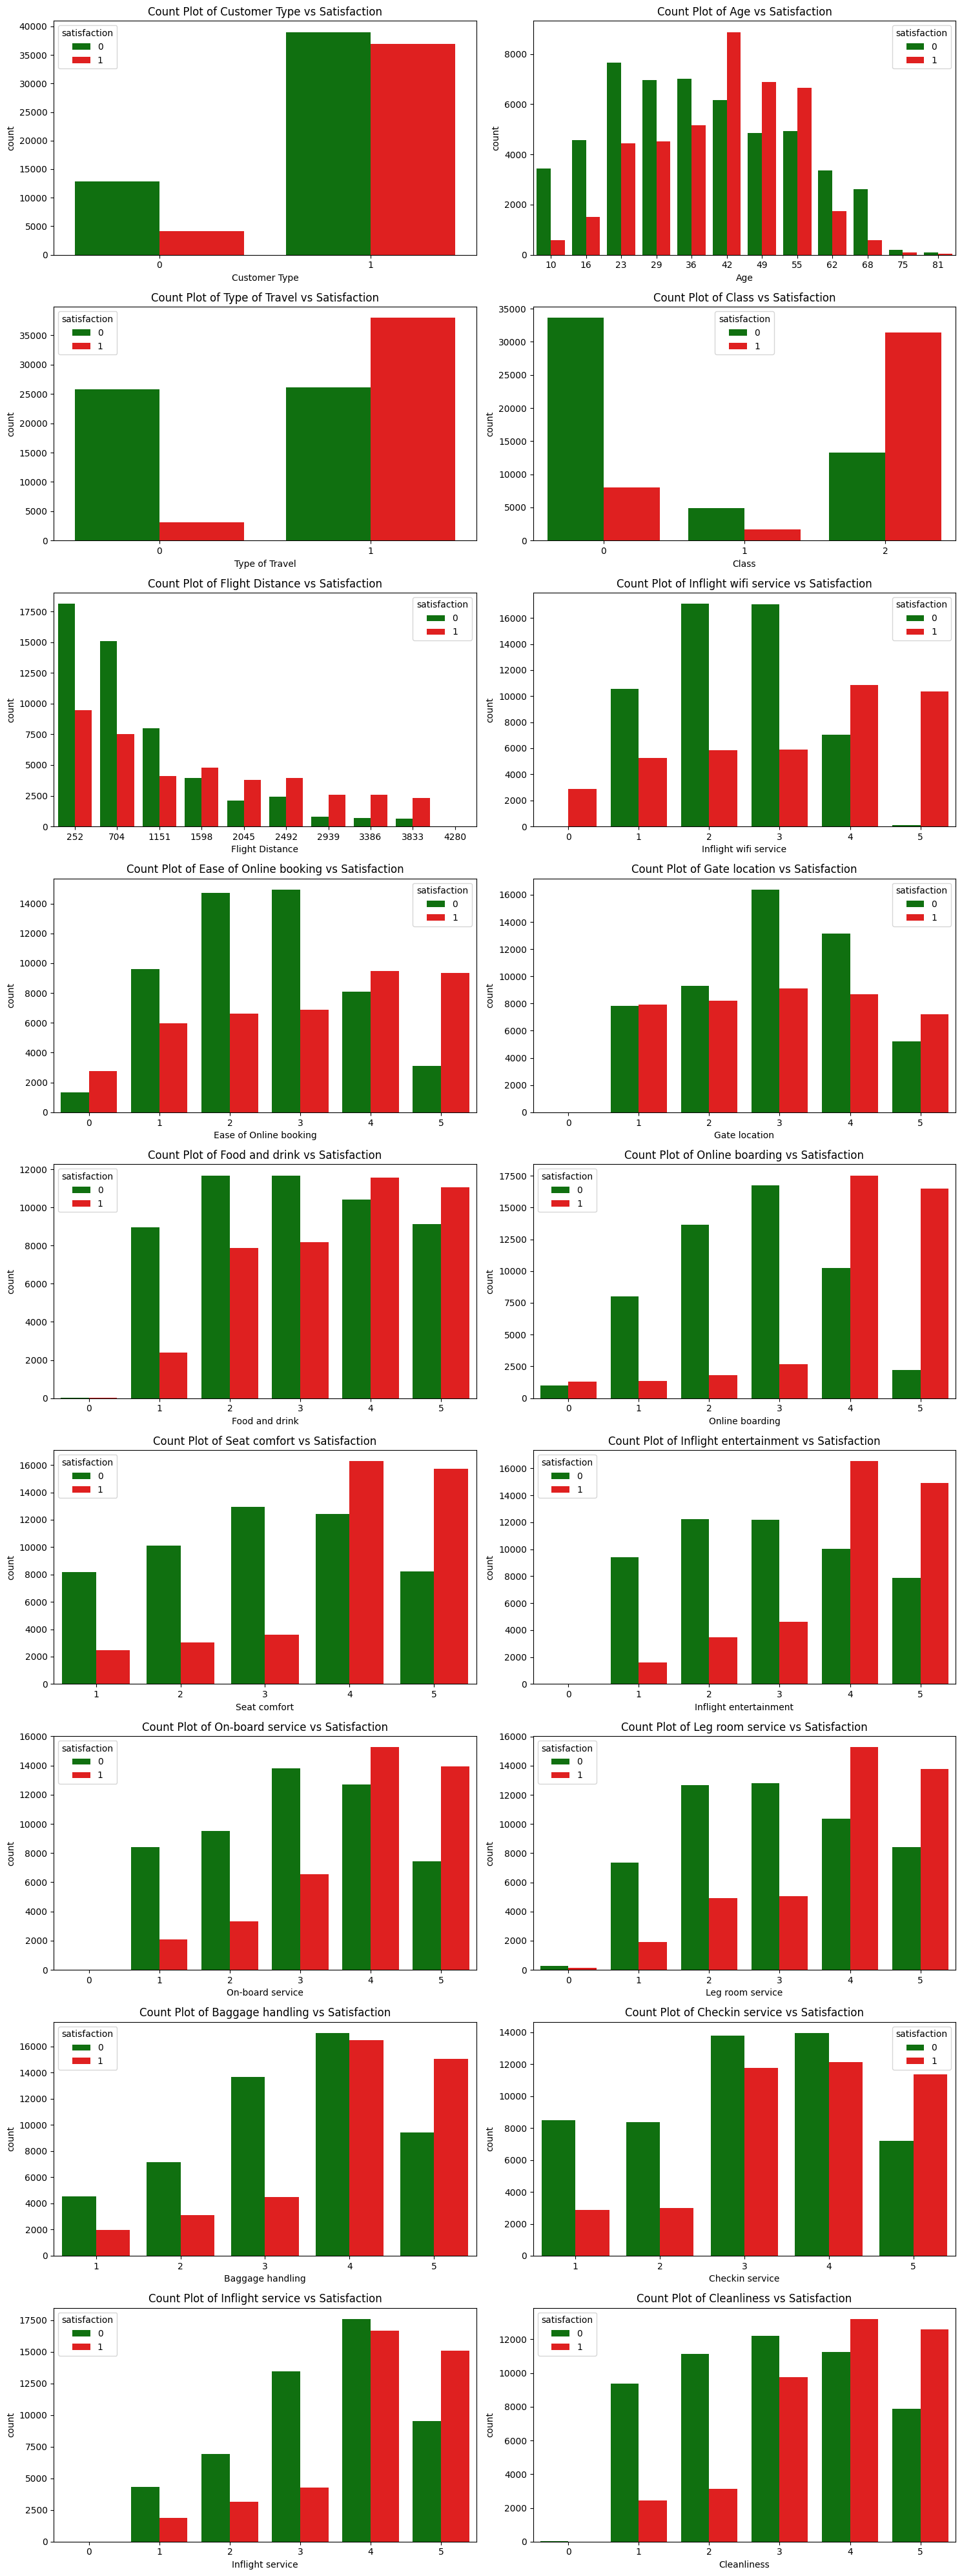

In [149]:

num_rows = 9
num_cols = 2

# Adjust the number of subplots to match the number of columns in 'train'
total_cols = len(train.columns)-1
num_rows = (total_cols + num_cols-1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Iterate through columns and create count plots
for i, col in enumerate(train.columns):
    row = i // num_cols
    column = i % num_cols

    if i < total_cols:  # Ensure we don't exceed the number of columns in 'train'
        sns.countplot(x=col, hue='satisfaction', palette=["green", "red"], data=train, ax=axes[row, column])
        axes[row, column].set_title(f'Count Plot of {col} vs Satisfaction')


plt.tight_layout()
plt.show()

##Result Columns

In [150]:
from sklearn.model_selection import KFold, cross_val_score
features = [ 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service','Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

accuracy_scores = {}
X_train = train[features]
y_train = train[target].to_numpy()

y_train = y_train.ravel()

k_fold = KFold(n_splits=10)
train_test_split_ratio = 0.1

## Decision Tree Classification N-Fold Cross Validation

Best Random State Value:  31
Max-Accuracy of N-Fold Validation with best RSV for Decision Tree: 0.9460570199031737


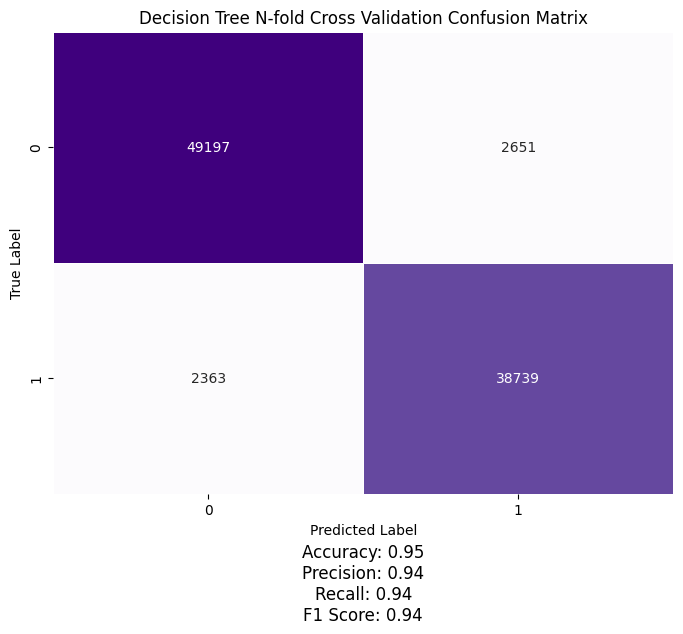

In [155]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report ,roc_curve, auc

max_accuracy = 0
best_rsv = 0
best_conf_matrix = None

for i in range(1,50):
  clf = DecisionTreeClassifier(random_state=i)
  clf.fit(X_train, y_train)
  y_pred = cross_val_predict(clf, X_train, y_train, cv = k_fold)

  # Calculate accuracy
  accuracy = accuracy_score(y_train, y_pred)

  # Calculate confusion matrix
  conf_matrix = confusion_matrix(y_train, y_pred)

  if (accuracy > max_accuracy):
    best_rsv = i
    max_accuracy = accuracy
    accuracy_scores_dt_kfold = scores
    best_conf_matrix = conf_matrix


accuracy_scores['Decision Tree N-Fold Max Accuracy'] = max_accuracy

print("Best Random State Value: ", best_rsv)
print("Max-Accuracy of N-Fold Validation with best RSV for Decision Tree:", max_accuracy)

# Confusion Matrix

# Calculate precision, recall, and F1 score directly from the confusion matrix
precision = best_conf_matrix[1, 1] / (best_conf_matrix[1, 1] + best_conf_matrix[0, 1])
recall = best_conf_matrix[1, 1] / (best_conf_matrix[1, 1] + best_conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

# Constructing an annotation string
annotation_str = f"\n\nAccuracy: {max_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"

# Plotting the Confusion Matrix as a colored table with metrics
plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Purples", linewidths=.5, cbar=False)

# Adding the annotation string
plt.text(0.5, -0.15, annotation_str, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.title("Decision Tree N-fold Cross Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Decision Tree Classification Train-Test Split Technique

Best Random State Value:  8
Max-Accuracy of Train-Test Split with best RSV for Decision Tree: 0.9502958579881656


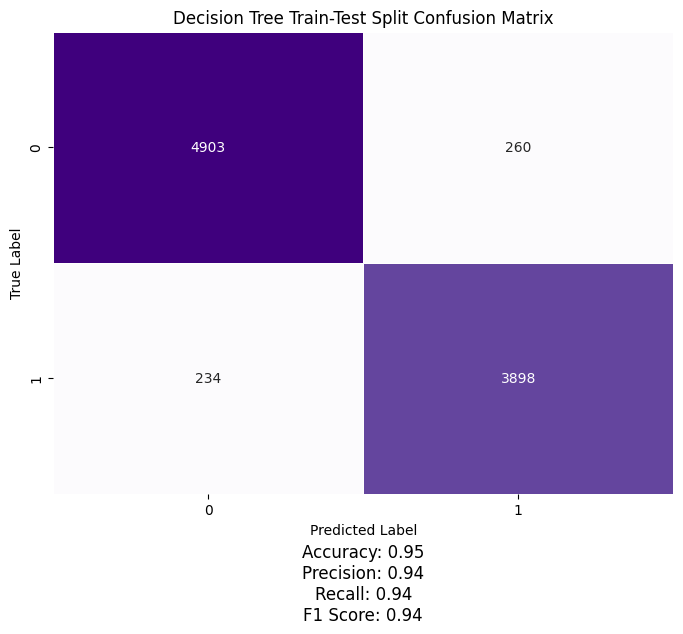

In [157]:
from sklearn.model_selection import train_test_split

# Perform a train-test split with 90% training and 10% testing
max_accuracy = 0
best_rsv = 0

for i in range(1,50):
  X_train_splitted, X_test_splitted, y_train_splitted, y_test_splitted = train_test_split(X_train, y_train, test_size=train_test_split_ratio, random_state=i)

  # Create a Decision Tree classifier
  clf = DecisionTreeClassifier()

  y_train_splitted = y_train_splitted.ravel()
  y_test_splitted = y_test_splitted.ravel()

  # Train the Decision Tree classifier on the training data
  clf.fit(X_train_splitted, y_train_splitted)

  # Make predictions on the test set
  y_pred = clf.predict(X_test_splitted)

  # Evaluate the accuracy of the model
  accuracy = accuracy_score(y_test_splitted, y_pred)

  if (accuracy > max_accuracy):
    max_accuracy = accuracy
    best_rsv = i

accuracy_scores['Decision Tree Train-Test Split Max Accuracy'] = max_accuracy

print("Best Random State Value: ", best_rsv)
print("Max-Accuracy of Train-Test Split with best RSV for Decision Tree:", max_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_splitted, y_pred)
# Calculate precision, recall, and F1 score directly from the confusion matrix
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

# Constructing an annotation string
annotation_str = f"\n\nAccuracy: {max_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"

# Plotting the Confusion Matrix as a colored table with metrics
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", linewidths=.5, cbar=False)

# Adding the annotation string
plt.text(0.5, -0.15, annotation_str, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.title("Decision Tree Train-Test Split Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## KNN Classification with N-fold cross validation

Best k-Neighbor Value:  5
Max-accuracy CV Accuracy with Best k-Neighbor Value for k-NN:  0.8996880043033889


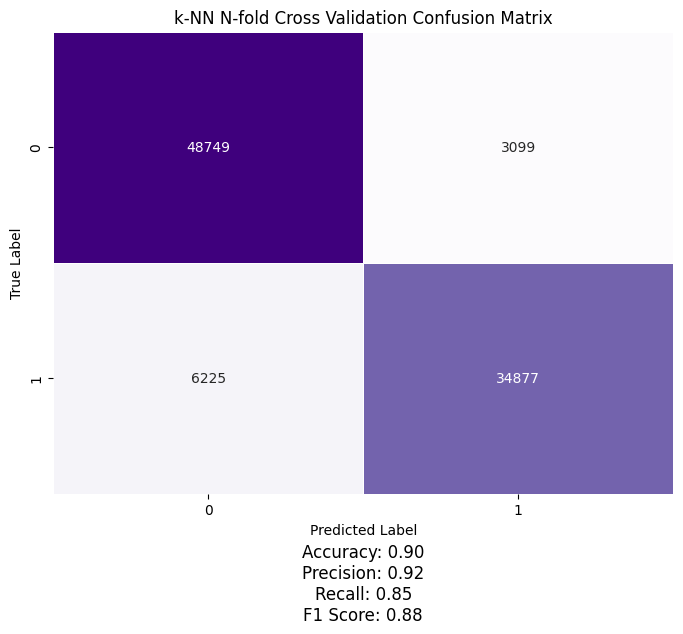

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

knn_model = KNeighborsClassifier()

max_accuracy = 0
best_k_value = 0
best_conf_matrix = None

for i in range(3, 8, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # Perform cross-validation
    y_pred = cross_val_predict(knn, X_train, y_train, cv=k_fold)

    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_train, y_pred)

    if accuracy > max_accuracy:
        best_k_value = i
        max_accuracy = accuracy
        best_conf_matrix = conf_matrix


accuracy_scores['k-NN N-Fold Max Accuracy'] = max_accuracy

print("Best k-Neighbor Value: ", best_k_value)
print("Max-accuracy CV Accuracy with Best k-Neighbor Value for k-NN: ", max_accuracy)

# Confusion Matrix

# Calculate precision, recall, and F1 score directly from the confusion matrix
precision = best_conf_matrix[1, 1] / (best_conf_matrix[1, 1] + best_conf_matrix[0, 1])
recall = best_conf_matrix[1, 1] / (best_conf_matrix[1, 1] + best_conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

# Constructing an annotation string
annotation_str = f"\n\nAccuracy: {max_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"

# Plotting the Confusion Matrix as a colored table with metrics
plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Purples", linewidths=.5, cbar=False)

# Adding the annotation string
plt.text(0.5, -0.15, annotation_str, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.title("k-NN N-fold Cross Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



## KNN Classification with test-train Split validation

Best Random State Value:  3
Max-Accuracy of Train-Test Split with best RSV: 0.9042495965572889


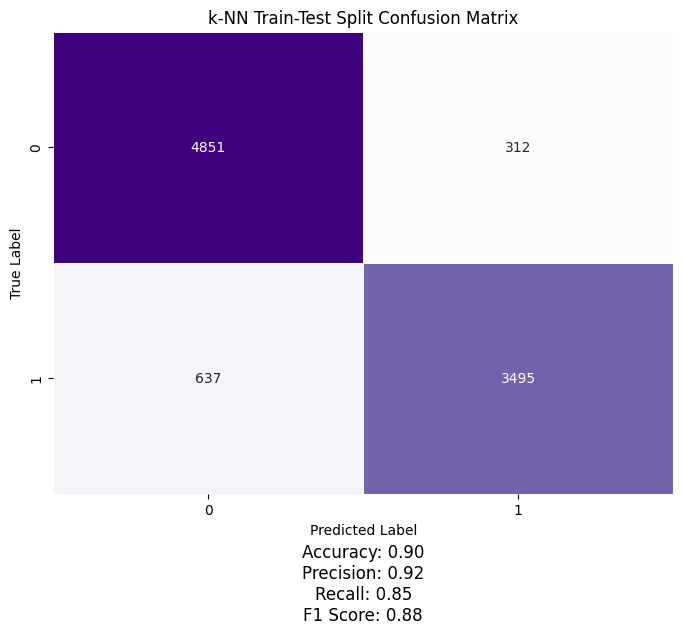

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# Perform a train-test split with 90% training and 10% testing
max_accuracy = 0
best_rsv = 0

for i in range(1, 10):
    X_train_splitted, X_test_splitted, y_train_splitted, y_test_splitted = train_test_split(
        X_train, y_train, test_size=train_test_split_ratio, random_state=i)

    y_train_splitted = y_train_splitted.ravel()
    y_test_splitted = y_test_splitted.ravel()

    # Create a K-Nearest Neighbors classifier
    knn_model = KNeighborsClassifier(n_neighbors=best_k_value)

    # Train the K-Nearest Neighbors classifier on the training data
    knn_model.fit(X_train_splitted, y_train_splitted)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test_splitted)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test_splitted, y_pred)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rsv = i


accuracy_scores['k-NN Train-Test Split Max Accuracy'] = max_accuracy

print("Best Random State Value: ", best_rsv)
print("Max-Accuracy of Train-Test Split with best RSV:", max_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_splitted, y_pred)
# Calculate precision, recall, and F1 score directly from the confusion matrix
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

# Constructing an annotation string
annotation_str = f"\n\nAccuracy: {max_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"

# Plotting the Confusion Matrix as a colored table with metrics
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", linewidths=.5, cbar=False)

# Adding the annotation string
plt.text(0.5, -0.15, annotation_str, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.title("k-NN Train-Test Split Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Naive Bayes N-Fold Cross Validation

Best var_smoothing Value: 1e-09
Max-Accuracy with Best var_smoothing Value using Naive Bayes: 0.8991823561054331


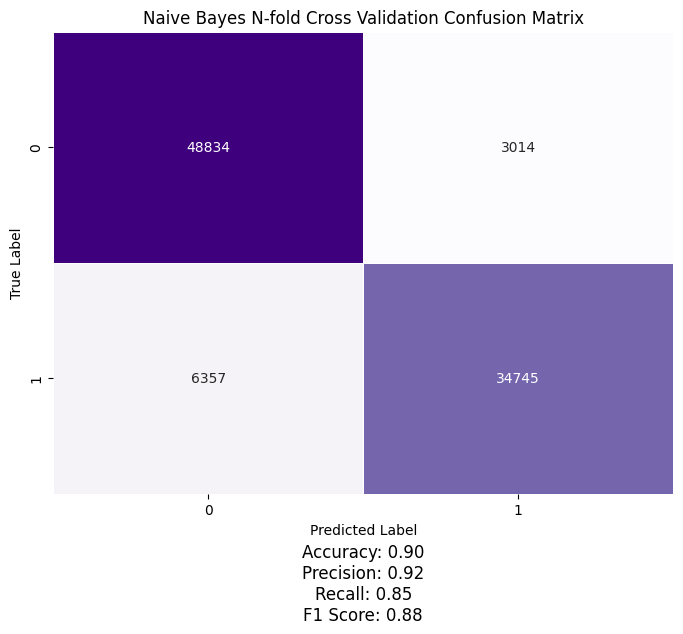

In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report ,roc_curve, auc


# Assuming X_train and y_train are defined earlier in your code

max_accuracy = 0
best_var_smoothing = 0
best_conf_matrix = None

for var_smoothing in [1e-9, 1e-8, 1e-7, 1e-6]:
    nb_model = GaussianNB(var_smoothing=var_smoothing)
    nb_model.fit(X_train, y_train)

    # Perform cross-validation
    y_pred = cross_val_predict(knn, X_train, y_train, cv=k_fold)

    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_train, y_pred)

    if accuracy > max_accuracy:
        best_var_smoothing = var_smoothing
        max_accuracy = accuracy
        best_conf_matrix = conf_matrix


accuracy_scores['Naive Bayes N-Fold Max Accuracy'] = max_accuracy

print("Best var_smoothing Value:", best_var_smoothing)
print("Max-Accuracy with Best var_smoothing Value using Naive Bayes:", max_accuracy)

# Confusion Matrix

# Calculate precision, recall, and F1 score directly from the confusion matrix
precision = best_conf_matrix[1, 1] / (best_conf_matrix[1, 1] + best_conf_matrix[0, 1])
recall = best_conf_matrix[1, 1] / (best_conf_matrix[1, 1] + best_conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

# Constructing an annotation string
annotation_str = f"\n\nAccuracy: {max_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"

# Plotting the Confusion Matrix as a colored table with metrics
plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Purples", linewidths=.5, cbar=False)

# Adding the annotation string
plt.text(0.5, -0.15, annotation_str, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.title("Naive Bayes N-fold Cross Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Naive Bayes Classification with Train-Test Split validation

Best Random State Value:  3
Max-Accuracy of Train-Test Split with best RSV using Naive Bayes: 0.8738031199569661


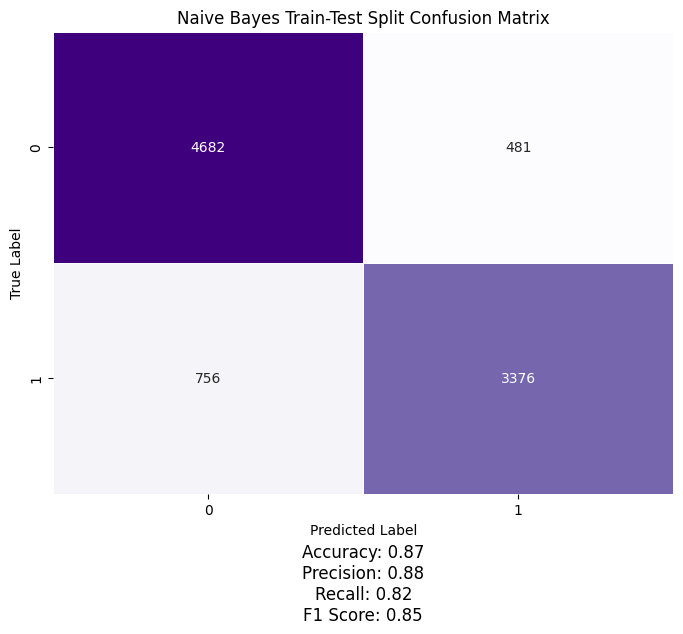

In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are defined earlier in your code


max_accuracy = 0
best_rsv = 0

for i in range(1, 10):
    X_train_splitted, X_test_splitted, y_train_splitted, y_test_splitted = train_test_split(X_train, y_train, test_size=train_test_split_ratio, random_state=i)

    # Create a Gaussian Naive Bayes classifier
    nb_model = GaussianNB(var_smoothing=1e-9)

    # Flatten y_train_splitted and y_test_splitted using ravel()
    y_train_splitted = y_train_splitted.ravel()
    y_test_splitted = y_test_splitted.ravel()

    # Train the Naive Bayes classifier on the training data
    nb_model.fit(X_train_splitted, y_train_splitted)

    # Make predictions on the test set
    y_pred = nb_model.predict(X_test_splitted)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test_splitted, y_pred)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rsv = i

accuracy_scores['Naive Bayes Train-Test Split Max Accuracy'] = max_accuracy

print("Best Random State Value: ", best_rsv)
print("Max-Accuracy of Train-Test Split with best RSV using Naive Bayes:", max_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_splitted, y_pred)
# Calculate precision, recall, and F1 score directly from the confusion matrix
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

# Constructing an annotation string
annotation_str = f"\n\nAccuracy: {max_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}"

# Plotting the Confusion Matrix as a colored table with metrics
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", linewidths=.5, cbar=False)

# Adding the annotation string
plt.text(0.5, -0.15, annotation_str, fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.title("Naive Bayes Train-Test Split Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



## Comparison of Models

In [162]:
# Create a DataFrame from the accuracy_scores dictionary

results = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
results = results.sort_values(by='Accuracy', ascending=False)
# Create a function to format the 'Accuracy' column as percentages
def format_percentage(value):
    return "{:.2%}".format(value)

# Apply the background gradient with formatted percentages
styled_results = results.style.background_gradient(cmap='Greens', subset='Accuracy').format({'Accuracy': format_percentage})
styled_results


,Model,Accuracy
1,Decision Tree Train-Test Split Max Accuracy,95.03%
0,Decision Tree N-Fold Max Accuracy,94.61%
3,k-NN Train-Test Split Max Accuracy,90.42%
2,k-NN N-Fold Max Accuracy,89.97%
4,Naive Bayes N-Fold Max Accuracy,89.92%
5,Naive Bayes Train-Test Split Max Accuracy,87.38%
